In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

!pip install nltk
import nltk

In [ ]:
df = pd.read_csv("IMDB Dataset.csv")

In [ ]:
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [ ]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
df.tail()

,review,sentiment
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative
49999,No one expects the Star Trek movies to be high...,negative


In [ ]:
df.shape

(50000, 2)

In [ ]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [ ]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [ ]:
df['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

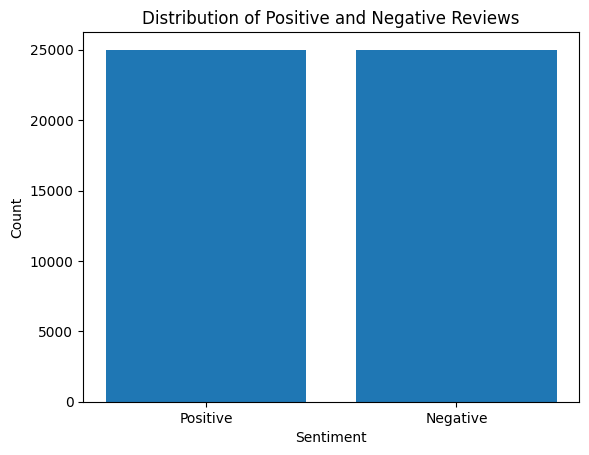

In [ ]:
# Count the number of positive and negative reviews
positive_count = df[df['sentiment'] == 1].shape[0]
negative_count = df[df['sentiment'] == 0].shape[0]

# Create a bar plot
labels = ['Positive', 'Negative']
counts = [positive_count, negative_count]

plt.bar(labels, counts)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Positive and Negative Reviews')
plt.show()

In [ ]:
df['review'] = df['review'].apply(lambda x: x.lower().replace('<br />', ''))
df['sentiment'].replace(['negative', 'positive'], [0, 1], inplace=True)
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,1
1,a wonderful little production. the filming tec...,1
2,i thought this was a wonderful way to spend ti...,1
3,basically there's a family where a little boy ...,0
4,"petter mattei's ""love in the time of money"" is...",1


In [ ]:
nltk.download('vader_lexicon')

from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
sentiments = []
for review in df['review']:
    sentiment = sia.polarity_scores(str(review))
    sentiments.append(sentiment)
for sentiment in sentiments:
    print(sentiment)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


Streaming output truncated to the last 5000 lines.
{'neg': 0.07, 'neu': 0.644, 'pos': 0.286, 'compound': 0.9898}
{'neg': 0.122, 'neu': 0.736, 'pos': 0.142, 'compound': 0.6295}
{'neg': 0.283, 'neu': 0.637, 'pos': 0.08, 'compound': -0.9293}
{'neg': 0.122, 'neu': 0.706, 'pos': 0.172, 'compound': 0.6912}
{'neg': 0.093, 'neu': 0.822, 'pos': 0.084, 'compound': -0.144}
{'neg': 0.089, 'neu': 0.817, 'pos': 0.093, 'compound': -0.6314}
{'neg': 0.055, 'neu': 0.877, 'pos': 0.068, 'compound': 0.6202}
{'neg': 0.171, 'neu': 0.733, 'pos': 0.096, 'compound': -0.9941}
{'neg': 0.187, 'neu': 0.662, 'pos': 0.151, 'compound': -0.7599}
{'neg': 0.137, 'neu': 0.743, 'pos': 0.12, 'compound': -0.1779}
{'neg': 0.207, 'neu': 0.736, 'pos': 0.057, 'compound': -0.9867}
{'neg': 0.066, 'neu': 0.831, 'pos': 0.103, 'compound': 0.7937}
{'neg': 0.088, 'neu': 0.673, 'pos': 0.239, 'compound': 0.8481}
{'neg': 0.057, 'neu': 0.791, 'pos': 0.152, 'compound': 0.9442}
{'neg': 0.085, 'neu': 0.713, 'pos': 0.202, 'compound': 0.9804}
{

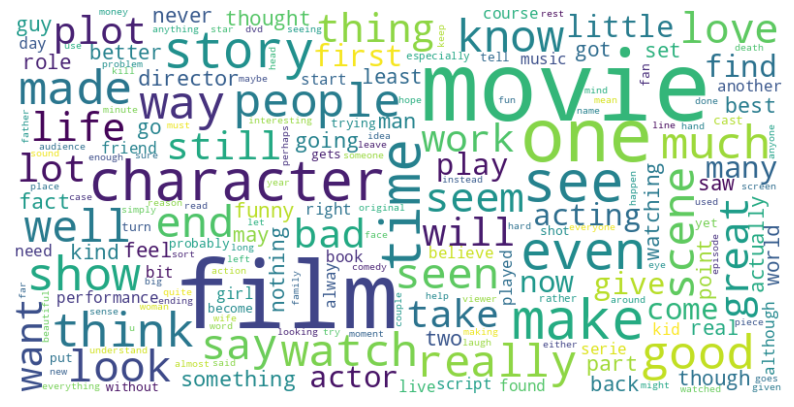

In [ ]:
#To generate the word cloud of all the reviews present in the dataset

from wordcloud import WordCloud
all_reviews = ' '.join(df['review'])

wordcloud = WordCloud(width=800, height=400, max_font_size=100, background_color='white').generate(all_reviews)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

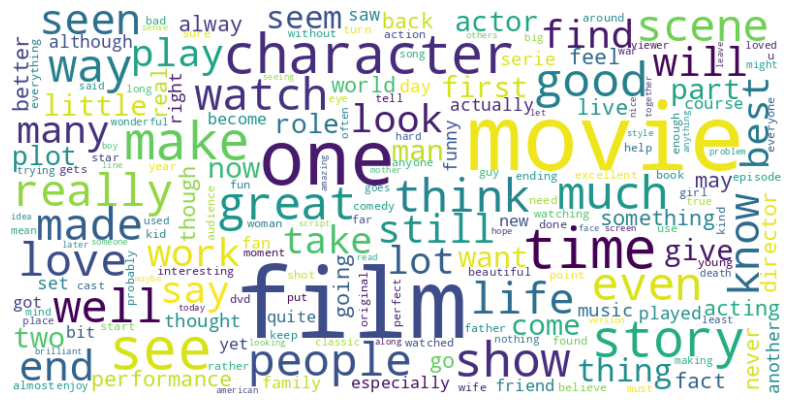

In [ ]:
positive_reviews = df[df['sentiment'] == 1]
positive_reviews_text = ' '.join(positive_reviews['review'])

# Generate the word cloud for positive reviews
wordcloud = WordCloud(width=800, height=400, max_font_size=100, background_color='white').generate(positive_reviews_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

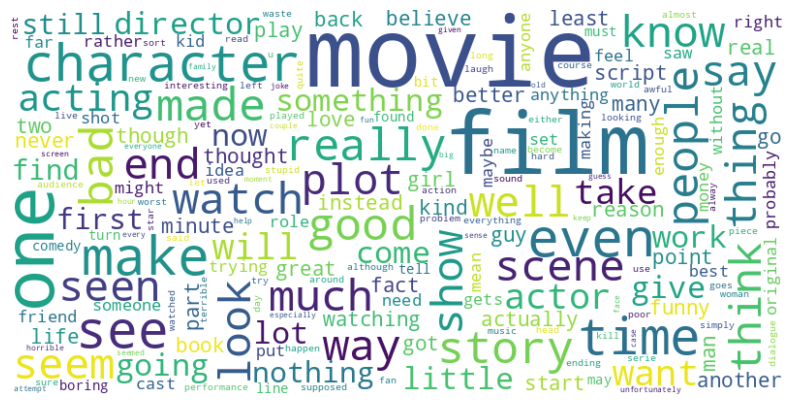

In [ ]:
negative_reviews = df[df['sentiment'] == 0]
negative_reviews_text = ' '.join(negative_reviews['review'])

# Generate the word cloud for positive reviews
wordcloud = WordCloud(width=800, height=400, max_font_size=100, background_color='white').generate(negative_reviews_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
X = df['review']
y = df['sentiment']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the sizes of the training and testing sets
print("Training set size:", len(X_train))
print("Testing set size:", len(X_test))

Training set size: 40000
Testing set size: 10000


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Feature extraction using Bag-of-Words
vectorizer = CountVectorizer()
X_train_features = vectorizer.fit_transform(X_train)
X_test_features = vectorizer.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
# Model training
model = LogisticRegression()
model.fit(X_train_features, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score
# Model evaluation
y_pred = model.predict(X_test_features)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100)

Accuracy: 88.81


In [ ]:
# Choose a specific review for prediction (Replace with the index of the review you want to predict)
review_index = 4
specific_review = df.loc[review_index, 'review']
specific_review_sentiment = df.loc[review_index, 'sentiment']

# Model deployment
specific_review_features = vectorizer.transform([specific_review])
predicted_sentiment = model.predict(specific_review_features)[0]

print("Review:", specific_review)
print("True sentiment:", specific_review_sentiment)
print("Predicted sentiment:", predicted_sentiment)

Review: petter mattei's "love in the time of money" is a visually stunning film to watch. mr. mattei offers us a vivid portrait about human relations. this is a movie that seems to be telling us what money, power and success do to people in the different situations we encounter. this being a variation on the arthur schnitzler's play about the same theme, the director transfers the action to the present time new york where all these different characters meet and connect. each one is connected in one way, or another to the next person, but no one seems to know the previous point of contact. stylishly, the film has a sophisticated luxurious look. we are taken to see how these people live and the world they live in their own habitat.the only thing one gets out of all these souls in the picture is the different stages of loneliness each one inhabits. a big city is not exactly the best place in which human relations find sincere fulfillment, as one discerns is the case with most of the peopl

In [ ]:
from sklearn.svm import SVC

# Model training
svm_model = SVC()
svm_model.fit(X_train_features, y_train)

SVC()

In [ ]:
# Model evaluation
y_pred = svm_model.predict(X_test_features)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100)

Accuracy: 88.22


In [ ]:
# Choose a specific review for prediction (Replace with the index of the review you want to predict)
svm_review_index = 1
svm_specific_review = df.loc[svm_review_index, 'review']
svm_specific_review_sentiment = df.loc[svm_review_index, 'sentiment']

# Model deployment
svm_specific_review_features = vectorizer.transform([svm_specific_review])
svm_predicted_sentiment = svm_model.predict(svm_specific_review_features)[0]

print("Review:", svm_specific_review)
print("True sentiment:", svm_specific_review_sentiment)
print("Predicted sentiment:", svm_predicted_sentiment)

Review: a wonderful little production. the filming technique is very unassuming- very old-time-bbc fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. the actors are extremely well chosen- michael sheen not only "has got all the polari" but he has all the voices down pat too! you can truly see the seamless editing guided by the references to williams' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. a masterful production about one of the great master's of comedy and his life. the realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional 'dream' techniques remains solid then disappears. it plays on our knowledge and our senses, particularly with the scenes concerning orton and halliwell and the sets (particularly of their flat with halliwell's murals decorating every surface) are terribly well done.
True sentiment: 1
Predicted s